In [2]:
import cv2
import torch
import torch.nn as nn
import numpy as np
import tensorflow as tf
import json
import matplotlib.pyplot as plt

/home/beegii/image_processing_dir/image_processing_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/beegii/image_processing_dir/image_processing_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/beegii/image_processing_dir/image_processing_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n

In [3]:
def conv2d(x, W, b, strides = 1):
    x = tf.nn.conv2d(x, W, strides = [1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

In [4]:
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize = [1, k, k, 1], strides = [1, k, k, 1], padding = 'SAME')

In [5]:
def neural_network(x, weight, bias, dropout):
    x = tf.reshape(x, shape = [-1, 28, 28, 1])
    
    conv1 = conv2d(x, weight['w1'], bias['b1']) # Convolutional Layer 1
    conv1 = maxpool2d(conv1) # Pooling Layer 1
    
    conv2 = conv2d(conv1, weight['w2'], bias['b2']) # Convolutional Layer 1
    conv2 = maxpool2d(conv2) # Pooling Layer 1
    
    # Fully Connected Layer 1
    # Reshaping output of previous convolutional layer to fit the fully connected layer
    fc = tf.reshape(conv2, [-1, weights['w3'].get_shape().as_list()[0]])
    fc = tf.add(tf.matmul(fc, weight['w3']), bias['b3']) # Linear Function
    fc = tf.nn.relu(fc) # Activation Function
    
    fc = tf.nn.dropout(fc, dropout) # Applying dropout on Fully Connected Layer
    
    out = tf.add(tf.matmul(fc, weight['w4']), bias['b4']) # Output Layer
    return out

In [6]:
X1 = tf.placeholder(tf.float32, shape = [None, 784]) # Placeholder for Feature Matrix
Y2 = tf.placeholder(tf.float32, shape = [None, 6]) # Placeholder for Labels
keep_prob = tf.placeholder(tf.float32) 

In [7]:
weights = {
    'w1' : tf.convert_to_tensor(np.array(np.load('w1.npy')),dtype=tf.float32),
    'w2' : tf.convert_to_tensor(np.array(np.load('w2.npy')),dtype=tf.float32),
    'w3' : tf.convert_to_tensor(np.array(np.load('w3.npy')),dtype=tf.float32),
    'w4' : tf.convert_to_tensor(np.array(np.load('w4.npy')),dtype=tf.float32)
}


FileNotFoundError: [Errno 2] No such file or directory: 'w1.npy'

In [8]:
biases = {
    'b1' : tf.convert_to_tensor(np.array(np.load('b1.npy')),dtype=tf.float32),
    'b2' : tf.convert_to_tensor(np.array(np.load('b2.npy')),dtype=tf.float32),
    'b3' : tf.convert_to_tensor(np.array(np.load('b3.npy')),dtype=tf.float32),
    'b4' : tf.convert_to_tensor(np.array(np.load('b4.npy')),dtype=tf.float32)
}

FileNotFoundError: [Errno 2] No such file or directory: 'b1.npy'

In [50]:
y_pred = neural_network(X1, weights, biases, 1.0)

In [51]:
def get_prediction(img):
    with tf.Session() as sess:
        pred = sess.run(y_pred, feed_dict = { X1 : img, keep_prob : 1.0 })
    img = img.reshape(28, 28)
    pred = list(pred.flatten())
    pred = pred.index(max(pred))*20
    return (img, pred)

In [52]:
img = cv2.imread("test/img1.jpg",0)
img = cv2.resize(img,(28,28))
img=img.flatten()
img = torch.tensor(img)

In [53]:
with open('test.json') as g:
    datatest = json.load(g)
    
size = 28
ldata = []
ydata = []
for zurag in datatest['test']:
    img = cv2.imread("test/"+zurag['name'],0)
    
    img = cv2.resize(img,(size,size))
  
    ldata.append(img.flatten())
    ydata.append(int(zurag['smile']))
print(len(ldata))
print(ydata)
X = torch.tensor(ldata)
Y = torch.tensor(ydata)
test_x = X

test_y = Y


print(test_x.shape)

print(test_y.shape)

17
[0, 5, 4, 5, 4, 4, 3, 1, 1, 5, 2, 0, 3, 4, 0, 5, 4]
torch.Size([17, 784])
torch.Size([17])


In [1]:
image, pred = get_prediction(img.reshape(1, 784))

NameError: name 'get_prediction' is not defined

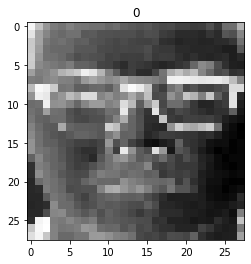

In [58]:
plt.imshow(image, cmap = 'binary')
plt.title(pred)
plt.show()